In [17]:
BATCH_SIZE = 128
GATE_OPTIMIZER = 'softmax'
NETWORK_OPTIMIZER_LR = 0.01
GUMBEL_TAU = 0.25
GROUP_SUM_TAU = 30
NETWORK_LAYERS = 12
GATES_PER_NETWORK = 32_000
LOSS = 'cross_entropy'
EPOCHS = 20
SUB_EPOCHS = 50 ## total epochs = 20*50 = 1000

In [18]:
import torch
from torch import nn
from difflogic import LogicLayer, GroupSum

device = torch.device('cuda')

model = torch.nn.Sequential(
    torch.nn.Flatten(),
    LogicLayer(784,GATES_PER_NETWORK,device='cuda',implementation='cuda',gate_function=GATE_OPTIMIZER,gumbel_tau=GUMBEL_TAU),
    LogicLayer(GATES_PER_NETWORK,GATES_PER_NETWORK,device='cuda',implementation='cuda',gate_function=GATE_OPTIMIZER,gumbel_tau=GUMBEL_TAU),
    LogicLayer(GATES_PER_NETWORK,GATES_PER_NETWORK,device='cuda',implementation='cuda',gate_function=GATE_OPTIMIZER,gumbel_tau=GUMBEL_TAU),
    LogicLayer(GATES_PER_NETWORK,GATES_PER_NETWORK,device='cuda',implementation='cuda',gate_function=GATE_OPTIMIZER,gumbel_tau=GUMBEL_TAU),
    LogicLayer(GATES_PER_NETWORK,GATES_PER_NETWORK,device='cuda',implementation='cuda',gate_function=GATE_OPTIMIZER,gumbel_tau=GUMBEL_TAU),
    LogicLayer(GATES_PER_NETWORK,GATES_PER_NETWORK,device='cuda',implementation='cuda',gate_function=GATE_OPTIMIZER,gumbel_tau=GUMBEL_TAU),
    LogicLayer(GATES_PER_NETWORK,GATES_PER_NETWORK,device='cuda',implementation='cuda',gate_function=GATE_OPTIMIZER,gumbel_tau=GUMBEL_TAU),
    LogicLayer(GATES_PER_NETWORK,GATES_PER_NETWORK,device='cuda',implementation='cuda',gate_function=GATE_OPTIMIZER,gumbel_tau=GUMBEL_TAU),
    LogicLayer(GATES_PER_NETWORK,GATES_PER_NETWORK,device='cuda',implementation='cuda',gate_function=GATE_OPTIMIZER,gumbel_tau=GUMBEL_TAU),
   GroupSum(10,tau=GROUP_SUM_TAU)
)

In [19]:
28*(28)

784

In [20]:
loss_epoch = []

In [21]:
x.shape

torch.Size([784, 1, 28, 28])

In [22]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),  # returns float in [0,1]
])

train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=256, shuffle=True, num_workers=4, pin_memory=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # difflogic recommends 0.01

model.train()
epochs = 50
for epoch in range(epochs):
    losse = 0
    for x, y in train_loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        losse = loss
        loss.backward()
        optimizer.step()
    loss_epoch.append(losse.detach().item())
    print(f"Epoch {epoch+1} done. {loss_epoch[-1]}")


Epoch 1 done. 2.3235907554626465
Epoch 2 done. 2.174541711807251
Epoch 3 done. 1.1390422582626343
Epoch 4 done. 0.6207031607627869
Epoch 5 done. 0.6586804389953613
Epoch 6 done. 0.5571523904800415
Epoch 7 done. 0.37203577160835266
Epoch 8 done. 0.4956870973110199
Epoch 9 done. 0.353456974029541
Epoch 10 done. 0.2877153158187866
Epoch 11 done. 0.2383996993303299
Epoch 12 done. 0.3450678586959839
Epoch 13 done. 0.33560797572135925
Epoch 14 done. 0.4004898965358734


Exception in thread Thread-42 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/home/ramganeshs/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/usr/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ramganeshs/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/pin_memory.py", line 55, in _pin_memory_loop
    do_one_step()
  File "/home/ramganeshs/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/pin_memory.py", line 32, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ramganeshs/.venv/lib/python3.12/si

KeyboardInterrupt: 

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),  # returns float in [0,1]
])

train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=256, shuffle=True, num_workers=4, pin_memory=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # difflogic recommends 0.01

model.train()
loss_epoch = []
epochs = 20
for epoch in range(epochs):
    losse = 0
    for x, y in train_loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        losse = loss
        loss.backward()
        optimizer.step()
    loss_epoch.append(losse.detach().item())
    print(f"Epoch {epoch+1} done. {loss_epoch[-1]}")


Epoch 1 done. 2.323890447616577
Epoch 2 done. 2.2858309745788574
Epoch 3 done. 2.3290531635284424
Epoch 4 done. 2.310992479324341
Epoch 5 done. 2.28647518157959
Epoch 6 done. 2.3257126808166504
Epoch 7 done. 2.3102476596832275
Epoch 8 done. 2.3540709018707275
Epoch 9 done. 2.390166997909546
Epoch 10 done. 2.311016798019409
Epoch 11 done. 2.30014705657959
Epoch 12 done. 2.306082248687744
Epoch 13 done. 2.280499219894409
Epoch 14 done. 2.274103879928589
Epoch 15 done. 2.269540548324585
Epoch 16 done. 2.2692179679870605
Epoch 17 done. 2.2293505668640137
Epoch 18 done. 2.2156360149383545
Epoch 19 done. 2.1674306392669678
Epoch 20 done. 2.1247828006744385


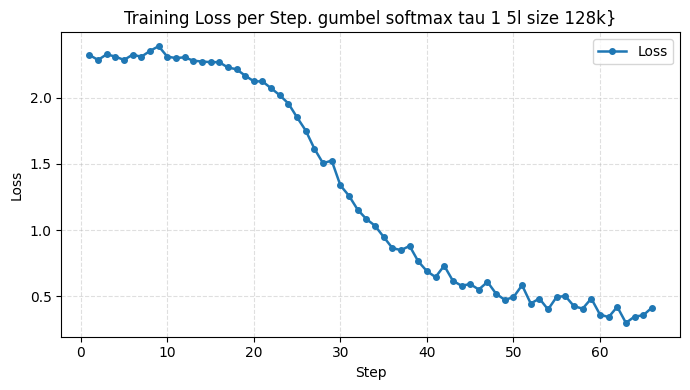

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

steps = np.arange(1, len(loss_epoch) + 1)

plt.figure(figsize=(7, 4))
plt.plot(steps, loss_epoch, marker='o', linewidth=1.8, markersize=4, label='Loss')
plt.title('Training Loss per Step. gumbel softmax tau 1 5l size 128k}')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
from difflogic.packbitstensor import PackBitsTensor
import numpy as np
import time
def packbits_eval(model, loader):
    orig_mode = model.training
    start = time.perf_counter()
    with torch.no_grad():
        model.eval()
        res = np.mean(
            [
                (model(PackBitsTensor(x.to('cuda').reshape(x.shape[0], -1).round().bool())).argmax(-1) == y.to(
                    'cuda')).to(torch.float32).mean().item()
                for x, y in loader
            ]
        )
        model.train(mode=orig_mode)
    elapsed = time.perf_counter() - start
    throughput = 10_000 / elapsed
    print(f"throughput : {throughput : .1f}/s")
    return res.item()




In [27]:
packbits_eval(model,test_loader)

throughput :  22712.3/s


0.807220584154129

In [25]:
import torch
import time
from torchvision import datasets, transforms

model.eval()
torch.cuda.synchronize()

test_ds = datasets.MNIST(root='./data', train=False, download=True,
                         transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(
    test_ds, batch_size=1024, shuffle=False, num_workers=4, pin_memory=True
)

# Warm-up
with torch.inference_mode():
    for i, (x, _) in enumerate(test_loader):
        x = x.to('cuda', non_blocking=True)
        _ = model(x)
        if i >= 2:
            break
torch.cuda.synchronize()
# Timed run with accuracy
total_images = 0
correct = 0

start = time.perf_counter()
with torch.inference_mode():
    for x, y in test_loader:
        x = x.to('cuda', non_blocking=True)
        y = y.to('cuda', non_blocking=True)
        logits = model(x)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total_images += x.size(0)

torch.cuda.synchronize()
elapsed = time.perf_counter() - start
throughput = 10000 / elapsed
accuracy = correct / total_images
error_rate = 1.0 - accuracy

print(f"Inference throughput (float inputs, eval-mode): {throughput:.1f} images/s")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Error rate: {error_rate*100:.2f}%")


Inference throughput (float inputs, eval-mode): 21401.5 images/s
Accuracy: 80.76%
Error rate: 19.24%


## compiling model into c code for cpu inference


In [135]:
import torch
from torch import nn
from difflogic import LogicLayer, GroupSum

device = torch.device('cuda')

model = nn.Sequential(
    nn.Flatten(),
    LogicLayer(784,  8000, device='cuda', implementation='cuda'),
    LogicLayer(8000, 8000, device='cuda', implementation='cuda'),
    LogicLayer(8000, 8000, device='cuda', implementation='cuda'),
    LogicLayer(8000, 8000, device='cuda', implementation='cuda'),
    LogicLayer(8000, 8000, device='cuda', implementation='cuda'),
   GroupSum(k=10, tau=30)
).to(device)

In [136]:
import difflogic

compiled_model = difflogic.CompiledLogicNet(
    model=model,            # the trained model (should be a `torch.nn.Sequential` with `LogicLayer`s)
    num_bits=64,            # the number of bits of the datatype used for inference (typically 64 is fastest, should not be larger than batch size)
    cpu_compiler='gcc',     # the compiler to use for the c code (alternative: clang)
    verbose=True            
)

Skipping torch.nn.Flatten layer (<class 'torch.nn.modules.flatten.Flatten'>).
Skipping GroupSum layer (<class 'difflogic.difflogic.GroupSum'>).
`layers` created and has 5 layers.


In [137]:
import difflogic

compiled_model = difflogic.CompiledLogicNet(
    model=model,            # the trained model (should be a `torch.nn.Sequential` with `LogicLayer`s)
    num_bits=64,            # the number of bits of the datatype used for inference (typically 64 is fastest, should not be larger than batch size)
    cpu_compiler='gcc',     # the compiler to use for the c code (alternative: clang)
    verbose=True            
)
compiled_model.compile(
    save_lib_path='mnist_softmax_16k_5l_tau_1_epoch_20.so',  # the (optional) location for storing the binary such that it can be reus
    verbose=True,
)

Skipping torch.nn.Flatten layer (<class 'torch.nn.modules.flatten.Flatten'>).
Skipping GroupSum layer (<class 'difflogic.difflogic.GroupSum'>).
`layers` created and has 5 layers.
C code created and has 40062 lines. (temp location /tmp/tmpldlo99k4.c)
Compiling finished in 34.717 seconds.
lib_file copied from /tmp/tmpg5mulzny.so to mnist_softmax_16k_5l_tau_1_epoch_20.so .


In [138]:
xs, ys = [],[]
for imgs, labels in test_loader:
    xs.append(imgs)
    ys.append(labels)
X = torch.cat(xs, dim=0).cpu().bool().numpy()
y = torch.cat(ys, dim=0).cpu().numpy()

In [139]:
import time
import difflogic.compiled_model 
compiled_model = compiled_model.load('/home/ramganeshs/research/src/testing/models/mnist_softmax_8k_5l.so',10,64)
start = time.perf_counter()
output = compiled_model(X)
elapsed = time.perf_counter() - start
throughput = 10000 / elapsed
print(f"Inference throughput: {throughput:.1f} images/s")
crr = 0
for i,out in enumerate(output):
    val, idx = torch.max(out, dim=0)
    if y[i] == idx:
        crr += 1
print(f"ACC : {crr/10000}")


Inference throughput: 710865.9 images/s
ACC : 0.9347


In [140]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Config
batch_size = 128
epochs = 3
lr = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data (MNIST 28x28 grayscale)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_ds = datasets.MNIST("./data", train=True, download=True, transform=transform)
test_ds  = datasets.MNIST("./data", train=False, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

# Simple CNN
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 16, 3, padding=1)   # 28x28 -> 28x28
        self.c2 = nn.Conv2d(16, 32, 3, padding=1)  # 28x28 -> 28x28
        self.p  = nn.MaxPool2d(2)                  # 28x28 -> 14x14
        self.f1 = nn.Linear(32*14*14, 64)
        self.f2 = nn.Linear(64, 10)
    def forward(self, x):
        x = F.relu(self.c1(x))
        x = self.p(F.relu(self.c2(x)))
        x = x.flatten(1)
        x = F.relu(self.f1(x))
        return self.f2(x)

model = CNN().to(device)
opt = torch.optim.Adam(model.parameters(), lr=lr)
crit = nn.CrossEntropyLoss()

def accuracy(logits, y):
    return (logits.argmax(1) == y).float().mean().item()

# Throughput helpers using CUDA events
def measure_epoch_throughput(train_loader):
    if device.type != "cuda":
        return None
    start = torch.cuda.Event(enable_timing=True)
    end   = torch.cuda.Event(enable_timing=True)
    total_images = 0
    torch.cuda.synchronize()
    start.record()
    for x, y in train_loader:
        x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)
        opt.zero_grad(set_to_none=True)
        out = model(x)
        loss = crit(out, y)
        loss.backward()
        opt.step()
        total_images += x.size(0)
    end.record()
    torch.cuda.synchronize()
    ms = start.elapsed_time(end)  # milliseconds
    images_per_sec = total_images / (ms / 1000.0)
    return images_per_sec

def measure_inference_throughput(test_loader, warmup_batches=5):
    if device.type != "cuda":
        return None
    # Warmup
    with torch.no_grad():
        for i, (x, _) in enumerate(test_loader):
            x = x.to(device, non_blocking=True)
            _ = model(x)
            if i >= warmup_batches:
                break
    torch.cuda.synchronize()
    start = torch.cuda.Event(enable_timing=True)
    end   = torch.cuda.Event(enable_timing=True)
    total_images = 0
    start.record()
    with torch.no_grad():
        for x, _ in test_loader:
            x = x.to(device, non_blocking=True)
            _ = model(x)
            total_images += x.size(0)
    end.record()
    torch.cuda.synchronize()
    ms = start.elapsed_time(end)
    images_per_sec = total_images / (ms / 1000.0)
    return images_per_sec

# Training loop
for epoch in range(1, epochs + 1):
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    n = 0

    # Measure throughput over the whole epoch (train)
    train_ips = measure_epoch_throughput(train_loader)

    # After throughput pass, we already updated model; compute train stats quickly on a small subset
    model.eval()
    with torch.no_grad():
        for i, (x, y) in enumerate(train_loader):
            x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)
            out = model(x)
            loss = crit(out, y)
            train_loss += loss.item() * x.size(0)
            train_acc += (out.argmax(1) == y).float().sum().item()
            n += x.size(0)
            if i >= 50:  # keep it light
                break
    train_loss /= n
    train_acc /= n

    # Eval accuracy on test set
    test_loss = 0.0
    test_acc = 0.0
    m = 0
    print(f"Epoch {epoch}: "
          f"train_loss={train_loss:.4f} train_acc={train_acc:.4f} ")


with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)
        out = model(x)
        loss = crit(out, y)
        test_loss += loss.item() * x.size(0)
        test_acc  += (out.argmax(1) == y).float().sum().item()
        m += x.size(0)
test_loss /= m
test_acc  /= m
infer_ips = measure_inference_throughput(test_loader)
print(f"Inference throughput: {infer_ips:.0f} images/sec")
print(f"test_loss={test_loss:.4f} test_acc={test_acc:.4f}")


Using device: cuda
Epoch 1: train_loss=0.0602 train_acc=0.9810 
Epoch 2: train_loss=0.0277 train_acc=0.9922 
Epoch 3: train_loss=0.0223 train_acc=0.9930 
Inference throughput: 25428 images/sec
test_loss=0.0409 test_acc=0.9867
